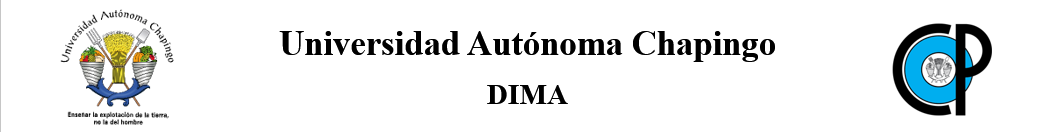

<p style="text-align: justify;"><font face="Times New Roman">Autor: Carlos Ulises Ambrosio Ambrosio</p>

## <center><h1><font face="Times New Roman">Mapas de clasificación</h1></center>
<h2><font face="Times New Roman">Clasificación supervisada</h2>
<p style="text-align: justify;"><font face="Times New Roman">La clasificación supervisada es un enfoque en el procesamiento de datos, particularmente en la clasificación de imágenes satelitales, en el que se utilizan datos etiquetados de entrenamiento para enseñar a un modelo a reconocer patrones específicos y asignar categorías a nuevos datos no etiquetados. En el contexto del machine learning, la clasificación supervisada implica entrenar algoritmos para aprender las características o atributos de las diferentes clases (por ejemplo, agua, bosque, áreas urbanas) a partir de un conjunto de datos de entrenamiento conocido y luego aplicar ese conocimiento para clasificar nuevos datos.</p>
<p style="text-align: justify;"><font face="Times New Roman">Para la clasificación supervisada se emplea una combinación de librerías que ya se han repasado anteriormente, sin embargo de las principales se tiene Scikit-learn, es una biblioteca de Python ampliamente utilizada para el machine learning. Proporciona herramientas eficientes y fáciles de usar para el análisis predictivo de datos, con algoritmos de aprendizaje supervisado y no supervisado, procesamiento de datos y validación de modelos. Fue desarrollada sobre bibliotecas como NumPy, SciPy y matplotlib, lo que la convierte en una opción flexible y poderosa para el desarrollo de modelos de aprendizaje automático.</p>

In [3]:
import numpy as np
import rasterio
import sklearn
from rasterio.plot import show

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [4]:
#Se preparan los datos de entrenamiento
pixeles = []
etiquetas = []

In [5]:
#directorio donde se tengan los datos a entrenar
directorio_coberturas = r"C:\Users\ambro\Downloads\datos\Entrenamiento"

In [6]:
#con bucles leemos y obtenemos el directorio las muestras a usar
for cobertura in range(1, 4):
    carpeta = directorio_coberturas + '\\Cobertura_' + str(cobertura)
    for muestra in range(1, 8):
        archivo = carpeta + '\\muestra' + str(muestra) + '.tif'
        #se leen los archivos 
        with rasterio.open(archivo) as muestra_entrenamiento:
            imagen = muestra_entrenamiento.read()
            #se aplanan las imagenes para pasar de una tercera dimension a una plana (se obtiene una solo dimensión lista de listas)
            imagen = imagen.reshape((imagen.shape[0], -1)).T
            # se guardan los datos en pixeles y etiquetas
            pixeles.extend(imagen)
            etiquetas.extend([cobertura] * imagen.shape[0])

In [7]:
#Una vez configurado las imagenes convertimos a un array de numpy
pixeles = np.array(pixeles)
etiquetas = np.array(etiquetas)

In [8]:
#dividimos los datos en datos para entrenamiento y pruebas
pixeles_entrenamiento, pixeles_test, etiquetas_entrenamiento, etiquetas_test = train_test_split(pixeles, etiquetas, test_size = 0.20)

In [9]:
#Normalizamos los datos para tener los valores en el mismo rango o escala para poder trabajar
scaler = StandardScaler()

In [10]:
#ajustamos y escalamos los pixeles de entramiento y de test
scaler.fit(pixeles_entrenamiento)
pixeles_entrenamiento = scaler.transform(pixeles_entrenamiento)
pixeles_test = scaler.transform(pixeles_test)

In [11]:
#los k vecinos más cercanos entrenamos el modelo
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(pixeles_entrenamiento, etiquetas_entrenamiento)

KNeighborsClassifier()

In [12]:
KNeighborsClassifier()

KNeighborsClassifier()

In [13]:
#añadimos la imagen a clasificar
directorio_imagen_satelital = r"C:\Users\ambro\Downloads\datos\LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif"

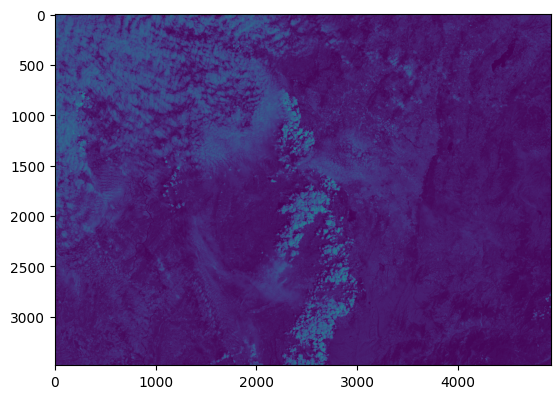

7


In [25]:
#visualizamos la imagen a clasificar
imagen_satelital = rasterio.open(directorio_imagen_satelital)
imagen=imagen_satelital.read(7)
show(imagen)
num=imagen_satelital.count
print(num)

In [43]:
#Extraemos los metadatos de la imagen original para transformarla y restaurarla
with rasterio.open(directorio_imagen_satelital) as imagen_satelital:
    imagen_a_clasificar = imagen_satelital.read()
    
    metadata_original = imagen_satelital.profile

In [65]:
#preparamos la imagen a clasificar, aplanamos y extraemos los datos para darselo al modelo de machine learning
imagen_a_clasificar = imagen_a_clasificar.reshape((imagen_a_clasificar.shape[0], -1)).T
imagen_a_clasificar = scaler.transform(imagen_a_clasificar)

In [66]:
# con .predict va tratar de predecir en base a datos que ya se entreno en base a las firmas espectrales
imagen_clasificada_knn = knn.predict(imagen_a_clasificar)

In [67]:
#Se destransforma la imagen un reshape en base el ancho y alto de la original
imagen_clasificada_knn = imagen_clasificada_knn.reshape((metadata_original['height'], metadata_original['width']))

In [68]:
#ruta donde se va guardar la imagen clasificada
directorio_imagen_satelital_clasificada = r'C:\Users\ambro\Downloads\datos\imagen_clasificada_knn.tif'

In [69]:
#Se restaura la imagen 
metadata_original.update(count = 1, dtype = rasterio.int32)

In [71]:
with rasterio.open(directorio_imagen_satelital_clasificada, 'w', **metadata_original) as imagen_satelital:
    imagen_satelital.write(imagen_clasificada_knn.astype(rasterio.int32), 1)

In [72]:
#abrimos la imagen que se creó
with rasterio.open(directorio_imagen_satelital_clasificada) as imagen_clasificada_knn:
    imagen_knn = imagen_clasificada_knn.read(1)

In [73]:
#creamos una rampa de colores para poder visualizar
colores = ['orange', 'gray', 'blue']
rampa_de_colores = mcolors.ListedColormap(colores)

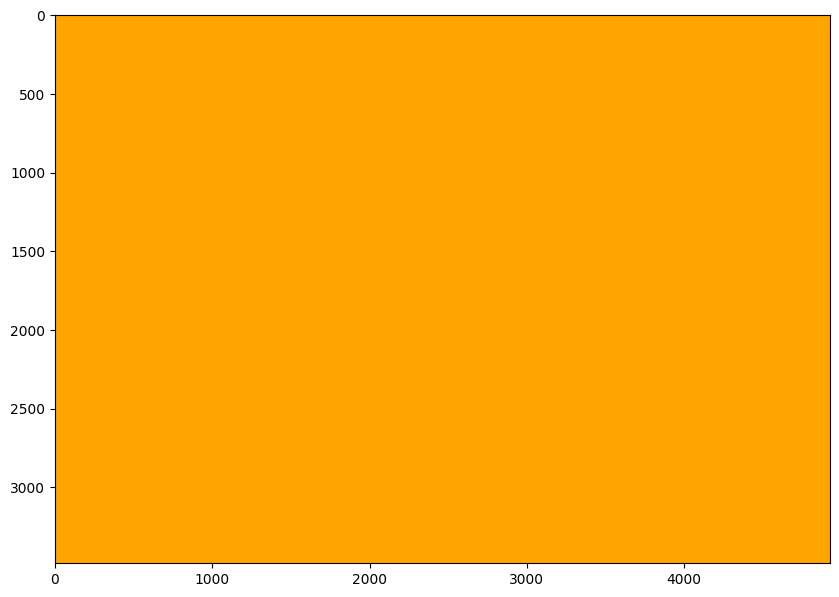

In [74]:
#visualizamos la imagen clasificada
fig, ax = plt.subplots(figsize = (10, 10))
img = ax.imshow(imagen_knn, cmap = rampa_de_colores)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [82]:
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data  # Características (longitud y ancho del sépalo y pétalo)
y = iris.target  # Etiquetas (especies de Iris)

In [84]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Crear un modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [86]:
# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [88]:
# Evaluamos el rendimiento del modelo utilizando varias métricas.
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Precisión del modelo:
Accuracy: 1.00


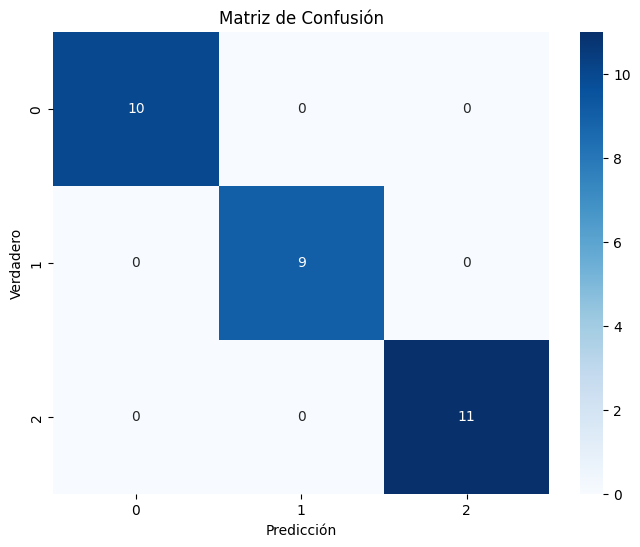

In [90]:
import seaborn as sns

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

<h2><font face="Times New Roman">Clasificación no supervisada</h2>
<p style="text-align: justify;"><font face="Times New Roman">La clasificación de mapas no supervisada es un proceso en el análisis de imágenes satelitales y en el procesamiento de datos geoespaciales que busca identificar patrones y agrupaciones en los datos sin la necesidad de etiquetas predefinidas o entrenamiento previo. A diferencia de la clasificación supervisada, donde se utilizan datos etiquetados para entrenar un modelo, en la clasificación no supervisada se utilizan únicamente las características de los datos para encontrar grupos o clases.</p>
<p style="text-align: justify;"><font face="Times New Roman">Características Clave de la Clasificación No Supervisada
Sin Etiquetas Previas: No se requiere un conjunto de datos de entrenamiento etiquetado. El algoritmo intenta descubrir estructuras subyacentes en los datos por sí mismo.

Agrupación de Datos: Los métodos de clasificación no supervisada agrupan píxeles o elementos similares en clases basadas en sus características, como la intensidad espectral en imágenes satelitales.

Identificación de Patrones: Ayuda a identificar patrones o clústeres en los datos, que pueden representar diferentes tipos de cobertura terrestre o características geográficas.

Técnicas Comunes:

K-means: Un algoritmo de agrupamiento que divide los datos en 
𝑘
k grupos basados en la cercanía de los puntos de datos a los centroides de los grupos.
Análisis de Componentes Principales (PCA): Se utiliza para reducir la dimensionalidad de los datos, lo que facilita la visualización y la agrupación.
Algoritmos de Agrupamiento Jerárquico: Estos crean una jerarquía de grupos de datos y se pueden utilizar para identificar relaciones entre ellos.
Resultados: El resultado de la clasificación no supervisada es un mapa de clases donde cada píxel de la imagen está asignado a un grupo. Estos grupos pueden interpretarse en el contexto de la cobertura del suelo o características de interés.</p>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [76]:
# Generar datos sintéticos
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 puntos en un espacio de 2 dimensiones
# Agregar algunos puntos alrededor de centros (0.2, 0.2) y (0.8, 0.8)
X = np.concatenate([X, np.random.rand(10, 2) * 0.1 + np.array([0.2, 0.2])])
X = np.concatenate([X, np.random.rand(10, 2) * 0.1 + np.array([0.8, 0.8])])

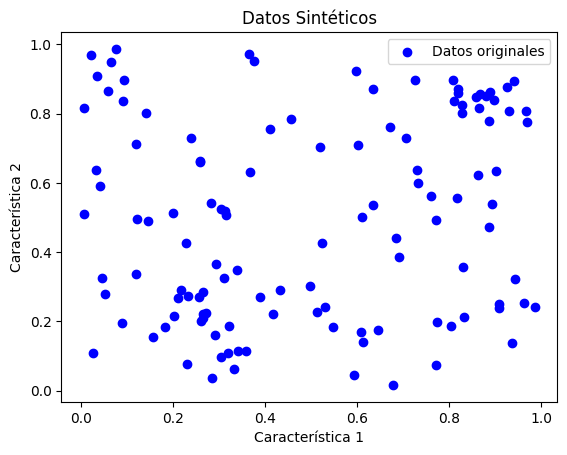

In [77]:
# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Datos originales')
plt.title('Datos Sintéticos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [78]:
# Utilizamos el algoritmo K-means para clasificar los datos en 2 grupos.
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

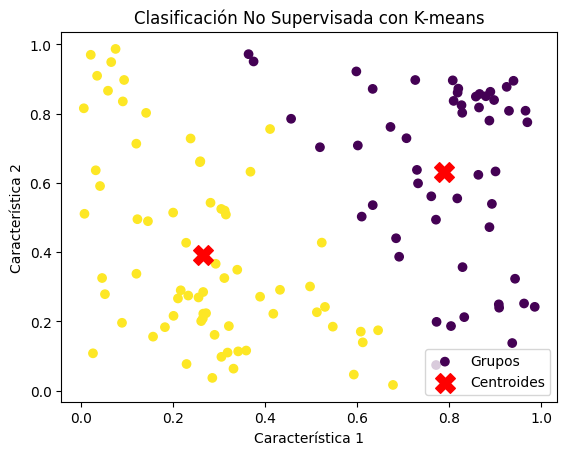

In [79]:
# Visualizar los resultados de K-means
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Grupos')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Clasificación No Supervisada con K-means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()
